In [85]:
import cv2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import random
import shutil
import pathlib
import itertools
import datetime
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from skimage.transform import resize
from matplotlib.pyplot import imshow
from IPython.display import clear_output
import concurrent.futures
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from keras import models
from keras import layers
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import ResNet50
from IPython.core.display import Image
from tensorflow.keras.applications import VGG16
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model, Model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam, SGD
from tensorflow.keras.optimizers import Adam, SGD
from imblearn.over_sampling import RandomOverSampler 
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import textwrap as tw
from pathlib import Path
from sklearn.metrics import auc,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import tensorflow_datasets as tfds
from PIL import Image, ImageEnhance
import multiprocessing
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

In [3]:
sp = pd.read_csv('/kaggle/input/spotify-top-artists-by-monthly-listeners/listeners.csv')
sp

,Artist,Listeners,Daily Trend,Peak,PkListeners
0,The Weeknd,"107,592,328","-138,880",1,"113,034,886"
1,Taylor Swift,"101,003,302",889,2,"101,003,302"
2,Ed Sheeran,"76,475,126","-68,137",2,"87,934,910"
3,Dua Lipa,"76,421,916","-71,356",4,"77,778,397"
4,Bad Bunny,"76,162,057","-199,052",3,"83,950,570"
...,...,...,...,...,...
2495,JosÃ© Luis Perales,"4,279,952","1,953",2291,"4,361,097"
2496,Olamide,"4,279,241",-415,2384,"4,301,258"
2497,Shalmali Kholgade,"4,277,053","6,831",1926,"4,717,659"
2498,La Receta,"4,276,935","-22,632",2405,"4,401,754"


In [5]:
sp.describe().T

,count,mean,std,min,25%,50%,75%,max
Peak,2500.0,1061.2228,639.7277,1.0,516.0,1034.5,1582.25,2493.0


In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist       2500 non-null   object
 1   Listeners    2500 non-null   object
 2   Daily Trend  2500 non-null   object
 3   Peak         2500 non-null   int64 
 4   PkListeners  2500 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.8+ KB


In [7]:
sp.isnull().sum()

Artist         0
Listeners      0
Daily Trend    0
Peak           0
PkListeners    0
dtype: int64

<Axes: title={'center': 'Spotify'}>

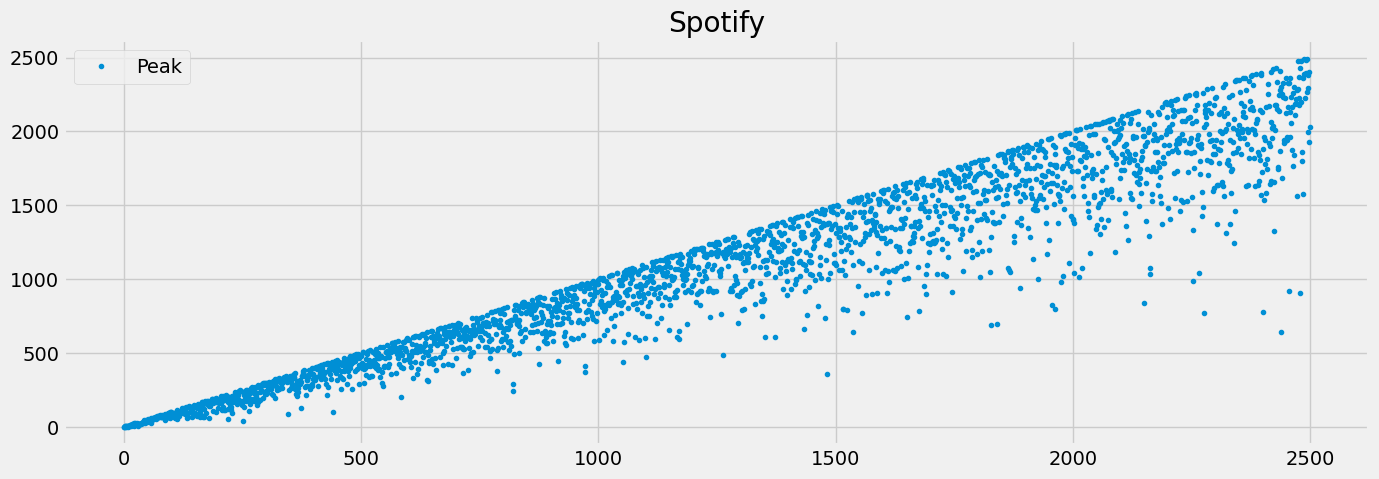

In [11]:
sp.plot(figsize=(15,5),style='.',color=color_pal[0],title='Spotify')

In [24]:
categorical_col = []
for column in sp.columns:
    if sp[column].dtype == object and len(sp[column].unique()) <= 50:
        categorical_col.append(column)

In [25]:
encoder = LabelEncoder()
sp['Artist'] = encoder.fit_transform(sp['Artist'])
Artist = {index : label for index, label in enumerate(encoder.classes_)}
Artist

{0: '$NOT',
 1: '$uicideboy$',
 2: '$werve',
 3: '(G)I-DLE',
 4: '*NSYNC',
 5: '070 Shake',
 6: '11:11 Music Group',
 7: '1nonly',
 8: '2 Chainz',
 9: '21 Savage',
 10: '24kGoldn',
 11: '2Pac',
 12: '3 Doors Down',
 13: '347aidan',
 14: '4 Non Blondes',
 15: '40k',
 16: '42 Dugg',
 17: '5 Seconds of Summer',
 18: '50 Cent',
 19: '6LACK',
 20: '6YNTHMANE',
 21: '6arelyhuman',
 22: '6ix9ine',
 23: '88rising',
 24: '9lives',
 25: 'A Boogie Wit da Hoodie',
 26: 'A Day To Remember',
 27: 'A Great Big World',
 28: 'A Touch Of Class',
 29: 'A Tribe Called Quest',
 30: 'A$AP Ferg',
 31: 'A$AP Rocky',
 32: 'A-Trak',
 33: 'A.R. Rahman',
 34: 'A7S',
 35: 'ABBA',
 36: 'AC/DC',
 37: 'ACRAZE',
 38: 'AFROJACK',
 39: 'AJ Tracey',
 40: 'AJR',
 41: 'ANAVITÃ\x93RIA',
 42: 'ANNA',
 43: 'ANOTR',
 44: 'AP Dhillon',
 45: 'ARIZONATEARS',
 46: 'ATB',
 47: 'AURORA',
 48: 'Aaliyah',
 49: 'Aaron Smith',
 50: 'Aastha Gill',
 51: 'Abhijay Sharma',
 52: 'Abhijeet',
 53: 'Abraham Mateo',
 54: 'Ace of Base',
 55: 'Ade

In [29]:
encoder = LabelEncoder()
sp['Daily Trend'] = encoder.fit_transform(sp['Daily Trend'])
DailyTrend = {index : label for index, label in enumerate(encoder.classes_)}
DailyTrend

{0: '-1,005',
 1: '-1,021',
 2: '-1,030',
 3: '-1,051',
 4: '-1,054',
 5: '-1,143',
 6: '-1,145',
 7: '-1,154',
 8: '-1,188',
 9: '-1,221',
 10: '-1,265',
 11: '-1,301',
 12: '-1,306',
 13: '-1,314',
 14: '-1,319',
 15: '-1,337',
 16: '-1,362',
 17: '-1,377',
 18: '-1,395',
 19: '-1,404',
 20: '-1,410',
 21: '-1,426',
 22: '-1,434',
 23: '-1,443',
 24: '-1,460',
 25: '-1,465',
 26: '-1,471',
 27: '-1,472',
 28: '-1,473',
 29: '-1,480',
 30: '-1,482',
 31: '-1,527',
 32: '-1,537',
 33: '-1,546',
 34: '-1,558',
 35: '-1,568',
 36: '-1,570',
 37: '-1,591',
 38: '-1,598',
 39: '-1,645',
 40: '-1,650',
 41: '-1,651',
 42: '-1,662',
 43: '-1,690',
 44: '-1,726',
 45: '-1,740',
 46: '-1,748',
 47: '-1,749',
 48: '-1,753',
 49: '-1,755',
 50: '-1,788',
 51: '-1,835',
 52: '-1,852',
 53: '-1,892',
 54: '-1,898',
 55: '-1,952',
 56: '-1,960',
 57: '-1,971',
 58: '-1,981',
 59: '-1,985',
 60: '-1,996',
 61: '-10,071',
 62: '-10,157',
 63: '-10,172',
 64: '-10,194',
 65: '-10,217',
 66: '-10,230',

In [27]:
encoder = LabelEncoder()
sp['Listeners'] = encoder.fit_transform(sp['Listeners'])
Listeners = {index : label for index, label in enumerate(encoder.classes_)}
Listeners

{0: '10,001,707',
 1: '10,004,725',
 2: '10,022,146',
 3: '10,023,650',
 4: '10,025,454',
 5: '10,031,334',
 6: '10,031,467',
 7: '10,042,303',
 8: '10,042,495',
 9: '10,046,109',
 10: '10,064,336',
 11: '10,066,210',
 12: '10,076,850',
 13: '10,095,113',
 14: '10,111,704',
 15: '10,114,594',
 16: '10,123,490',
 17: '10,131,037',
 18: '10,132,691',
 19: '10,141,636',
 20: '10,161,294',
 21: '10,166,833',
 22: '10,168,254',
 23: '10,177,076',
 24: '10,190,863',
 25: '10,193,951',
 26: '10,200,387',
 27: '10,205,951',
 28: '10,224,872',
 29: '10,225,156',
 30: '10,229,614',
 31: '10,240,598',
 32: '10,242,227',
 33: '10,262,457',
 34: '10,268,704',
 35: '10,269,046',
 36: '10,271,396',
 37: '10,274,981',
 38: '10,276,283',
 39: '10,284,935',
 40: '10,301,628',
 41: '10,304,947',
 42: '10,311,540',
 43: '10,318,612',
 44: '10,322,082',
 45: '10,325,079',
 46: '10,329,353',
 47: '10,342,214',
 48: '10,342,684',
 49: '10,349,727',
 50: '10,353,764',
 51: '10,378,022',
 52: '10,400,018',
 53

In [28]:
encoder = LabelEncoder()
sp['PkListeners'] = encoder.fit_transform(sp['PkListeners'])
PkListeners = {index : label for index, label in enumerate(encoder.classes_)}
PkListeners

{0: '10,005,709',
 1: '10,006,198',
 2: '10,017,461',
 3: '10,019,022',
 4: '10,042,261',
 5: '10,043,060',
 6: '10,060,800',
 7: '10,064,336',
 8: '10,069,643',
 9: '10,072,106',
 10: '10,073,179',
 11: '10,073,438',
 12: '10,076,850',
 13: '10,081,564',
 14: '10,095,739',
 15: '10,096,879',
 16: '10,106,926',
 17: '10,109,410',
 18: '10,113,379',
 19: '10,118,759',
 20: '10,127,826',
 21: '10,132,691',
 22: '10,134,814',
 23: '10,141,150',
 24: '10,144,142',
 25: '10,151,818',
 26: '10,154,680',
 27: '10,156,799',
 28: '10,158,586',
 29: '10,161,294',
 30: '10,165,996',
 31: '10,179,388',
 32: '10,180,323',
 33: '10,192,747',
 34: '10,200,557',
 35: '10,200,779',
 36: '10,201,287',
 37: '10,217,430',
 38: '10,225,156',
 39: '10,227,443',
 40: '10,245,917',
 41: '10,271,396',
 42: '10,271,926',
 43: '10,282,823',
 44: '10,284,935',
 45: '10,296,202',
 46: '10,303,679',
 47: '10,307,314',
 48: '10,318,564',
 49: '10,318,769',
 50: '10,323,631',
 51: '10,329,353',
 52: '10,331,035',
 53

In [77]:
x = sp.drop('Peak',axis=1)
y =sp['Peak']

In [119]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
x = scaler.fit_transform(x)

print('x \n' , x[:10])
print('y \n' , y[:10])

x 
 [[0.88595438 0.04346076 0.09319287 0.09674829]
 [0.85314126 0.04305835 0.98055105 0.05379366]
 [0.25690276 0.8804829  0.42585089 0.941389  ]
 [0.24689876 0.88008048 0.44854133 0.86551586]
 [0.09403762 0.87967807 0.15518639 0.94058611]
 [0.74189676 0.87927565 0.55753647 0.93938177]
 [0.24529812 0.87887324 0.42423015 0.86511441]
 [0.43457383 0.87847082 0.78363047 0.86471297]
 [0.1132453  0.87806841 0.45137763 0.86310719]
 [0.6042417  0.877666   0.94813614 0.94098756]]
y 
 0    1
1    2
2    2
3    4
4    3
5    2
6    6
7    6
8    8
9    2
Name: Peak, dtype: int64


In [120]:
print("xtrain shape is:",xtrain.shape)
print("xtest shape is:",xtest.shape)
print("ytrain shape is:",ytrain.shape)
print("ytest shape is:",ytest.shape)

xtrain shape is: (1750, 4)
xtest shape is: (750, 4)
ytrain shape is: (1750,)
ytest shape is: (750,)


In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [81]:
model = XGBRegressor(n_estimator=1000,early_stopping_round=50)

model.fit(x,y)

[13:57:59] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [82]:
model.score(xtrain,ytrain)

0.9987415095231803

In [83]:
def print_score(clf, xtrain, ytrain, xtest, ytest, train=True):
    if train:
        pred = clf.predict(xtrain)
        clf_report = pd.DataFrame(classification_report(ytrain, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytrain, pred)}\n")
        
    elif train==False:
        pred = clf.predict(xtest)
        clf_report = pd.DataFrame(classification_report(ytest, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred)}\n")
        
        
        
        
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(xtrain, ytrain)

print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             1    2    3    4    6    7    9   11   13   17  ...  2387  2396  \
precision  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
recall     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
f1-score   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
support    1.0  4.0  3.0  2.0  3.0  1.0  1.0  1.0  3.0  1.0  ...   1.0   2.0   

           2411  2423  2429  2475  2493  accuracy  macro avg  weighted avg  
precision   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0  
recall      1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0  
f1-score    1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0  
support     1.0   1.0   2.0   1.0   1.0       1.0     1750.0        1750.0  

[4 rows x 1254 columns]
_______________________________________________
Confusion Matrix: 
 [[1 0 0 ... 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [101]:
model_params = {
    'linear_regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[10,20,50,100],
            'random_state':[0,42]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,20,50,100,200]
        }
    },
    'Ridge_regression':{
        'model':Ridge(tol=0.1),
        'params':{
             'alpha':[1,10,20,50,100],
            'max_iter':[50,100,200]
        }
    },
    'Lasso_regression':{
        'model':Lasso(tol=0.1),
        'params':{
            'alpha':[1,10,20,50,100],
            'max_iter':[50,100,200]
        }
    }
    
    
}

In [102]:
score=[]
best_score = 0
second_best_score = 0
best_model = None        # This is the best model in the end of the grid search cv
second_best_model = None #This is the second best model in the end of the grid search cv
for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5)
    clf.fit(xtrain,ytrain)
    
    if best_score<clf.best_score_:
        second_best_score =  best_score
        second_best_model =  best_model
        best_score = clf.best_score_
        best_model = clf.best_estimator_
    elif clf.best_score_>second_best_score:
        second_best_score = clf.best_score_
        second_best_model = clf.best_estimator_
    
    score.append({
        'model':model_name,
        'score':clf.best_score_,
        'param':clf.best_params_
    })
    

pd.DataFrame(score)

,model,score,param
0,linear_regression,0.077868,{}
1,Decision_Tree,0.965181,"{'max_depth': 50, 'random_state': 0}"
2,Random_Forest,0.976401,{'n_estimators': 200}
3,Ridge_regression,0.077895,"{'alpha': 1, 'max_iter': 50}"
4,Lasso_regression,0.078355,"{'alpha': 10, 'max_iter': 50}"


In [103]:
best_model.score(xtest,ytest)

0.9719309035630078

In [104]:
second_best_model.score(xtest,ytest)

0.9451873649675245

In [108]:
models = {
     'Random_Forest_Regressor':best_model,
    'Decision_Tree_regressor':second_best_model
}


result=[]
for model_name,model in models.items():
    ypred = model.predict(xtest)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared = False)
    
    result.append({
        'Model':model_name,
        'MSE':mse,
        'RMSE':rmse
    }) 

    
pd.DataFrame(result)

,Model,MSE,RMSE
0,Random_Forest_Regressor,10961.095170,104.695249
1,Decision_Tree_regressor,21404.554667,146.302955


In [109]:
best_model

RandomForestRegressor(n_estimators=200)

In [111]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.save('/kaggle/working/')
print('model saved')

model saved


In [126]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)


results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(sp.Peak, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [127]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters           aic
11  (0, 1, 2, 1)  33184.142690
29  (1, 1, 2, 1)  33184.504806
17  (0, 2, 2, 1)  33184.517787
47  (2, 1, 2, 1)  33186.461554
7   (0, 1, 0, 1)  33187.423438
                                     SARIMAX Results                                      
Dep. Variable:                               Peak   No. Observations:                 2500
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood              -16587.071
Date:                            Fri, 22 Sep 2023   AIC                          33184.143
Time:                                    14:46:23   BIC                          33213.237
Sample:                                         0   HQIC                         33194.708
                                           - 2500                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------

In [128]:
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))
    
    
sp[['Peak']]

,Peak
0,1
1,2
2,2
3,4
4,3
...,...
2495,2291
2496,2384
2497,1926
2498,2405
